# Create data visualizations comparing different groups of Copenhagen citizens.

In [1]:
file = "befkbhalderstatkode.csv"

## 1. Create a bar plot that shows distribution of german and british citizens in terms of age.

<IPython.core.display.Javascript object>


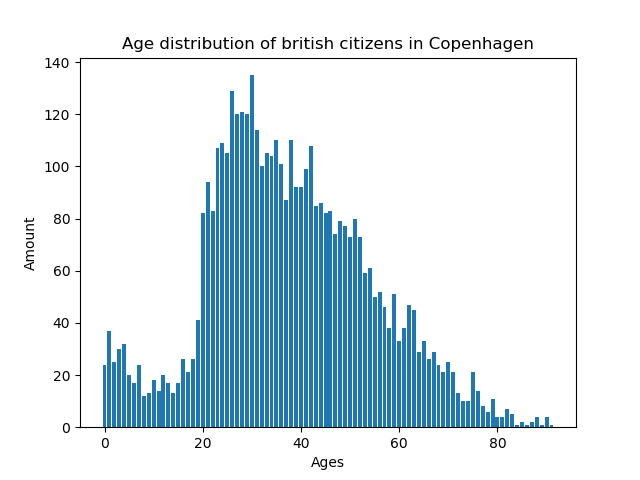

<IPython.core.display.Javascript object>


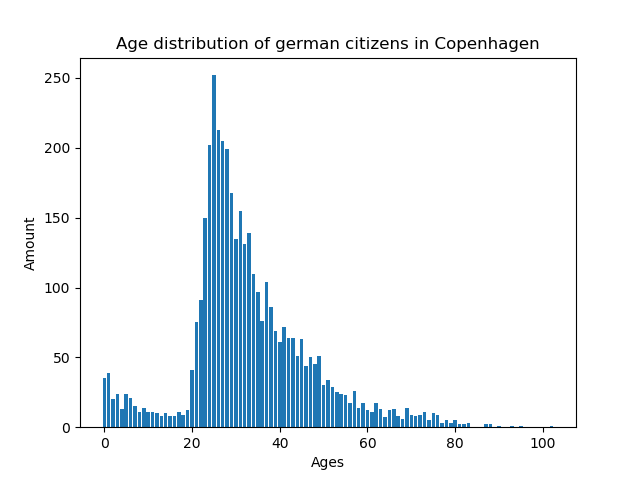

Text(0, 0.5, 'Amount')

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import copenhagen_data as cphd

statistics   = cphd.create_statistics_dict(file)
british_ages = cphd.ages_by_country(statistics[2015], 5170)
german_ages  = cphd.ages_by_country(statistics[2015], 5180)
  
plt.figure()
plt.bar(british_ages.keys(), british_ages.values())
plt.axis(min_y=0)
plt.title('Age distribution of british citizens in Copenhagen', fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)

plt.figure()
plt.bar(german_ages.keys(), german_ages.values())
plt.axis(min_y=0)
plt.title('Age distribution of german citizens in Copenhagen', fontsize=12)
plt.xlabel("Ages", fontsize=10)
plt.ylabel("Amount", fontsize=10)

## 2. How many French are there compared to Germans and how are they distributed over various neighbourhoods?

The total number of germans compared to french in all neighbourhoods:

<IPython.core.display.Javascript object>


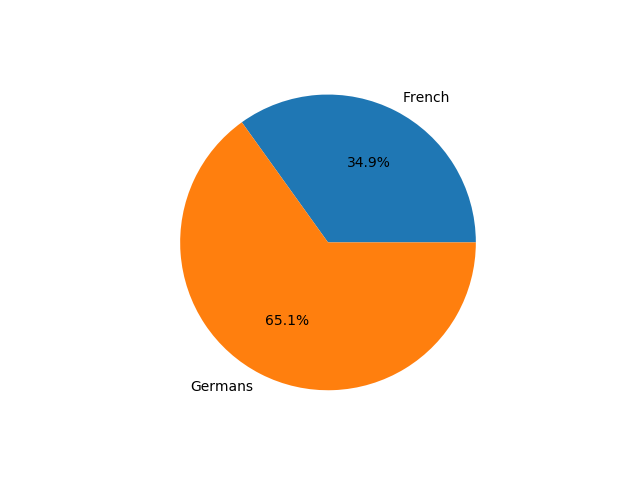

([<matplotlib.patches.Wedge at 0x2d0ecc500f0>,
 [Text(0.5023531895073607, 0.9785914740032133, 'French'),
  Text(-0.5023531895073607, -0.9785914740032134, 'Germans')],
 [Text(0.27401083064037857, 0.5337771676381163, '34.9%'),
  Text(-0.2740108306403785, -0.5337771676381163, '65.1%')])

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import copenhagen_data as cphd

statistics   = cphd.create_statistics_dict(file)
french_count = cphd.count_by_country(statistics[2015], 5130)
german_count = cphd.count_by_country(statistics[2015], 5180)

labels = ["French", "Germans"]
data = [french_count, german_count]

plt.figure()
plt.pie(data, labels=labels, autopct='%1.1f%%')

Distribution of german and french citizens across various neighbourhoods:

<IPython.core.display.Javascript object>


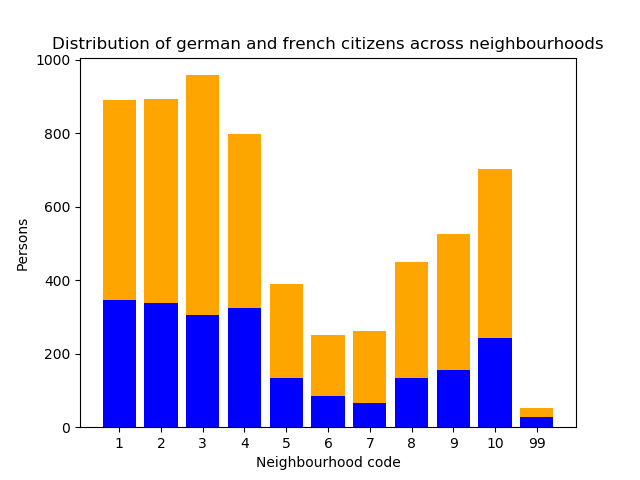

Text(0, 0.5, 'Persons')

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import copenhagen_data as cphd

statistics   = cphd.create_statistics_dict(file)
distribution = cphd.neighborhood_country_cmp(statistics[2015], [5180, 5130])
german_data  = distribution[5180]
french_data  = distribution[5130]
keys = list(map(str, german_data.keys()))

plt.figure()
plt.bar(keys, german_data.values(), bottom=list(french_data.values()), color='orange')
plt.bar(keys, french_data.values(), color="blue")
plt.title('Distribution of german and french citizens across neighbourhoods', fontsize=12)
plt.xlabel("Neighbourhood code", fontsize=10)
plt.ylabel("Persons", fontsize=10)

## 3. Create a pie chart showing the 5 major citizen groups of age between 20-65

<IPython.core.display.Javascript object>


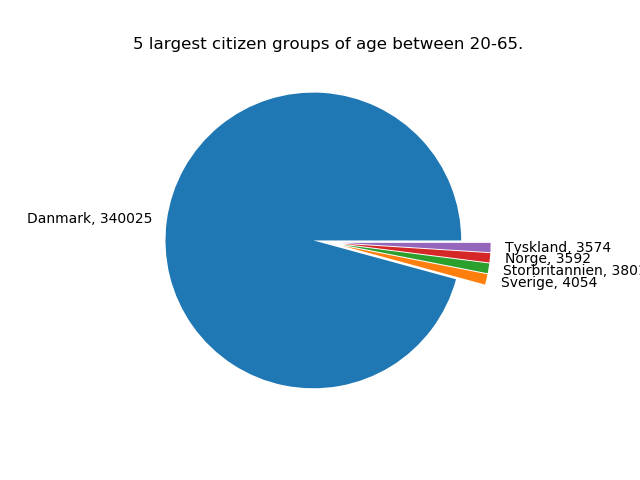

([<matplotlib.patches.Wedge at 0x2d0f3368208>,
 [Text(-1.1894162374090915, 0.15902519985084065, 'Danmark, 340025'),
  Text(1.168412665019183, -0.2735175391501805, 'Sverige, 4054'),
  Text(1.1845869249587941, -0.19171285094293558, 'Storbritannien, 3801'),
  Text(1.1945854343875077, -0.1138667640236167, 'Norge, 3592'),
  Text(1.1993999946036016, -0.0379427587937514, 'Tyskland, 3574')])

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt
import copenhagen_data as cphd

statistics = cphd.create_statistics_dict(file)
top_5  = cphd.top_5_in_age_range(statistics[2015], 20, 65)
labels = list(map(lambda code: cphd.get_country_name(code) + ", " + str(top_5[code]), top_5.keys()))
data   = top_5.values()
total = sum(data)
plt.figure()
plt.title("5 largest citizen groups of age between 20-65.")
plt.pie(data, labels=labels, explode=(0.1, 0.1, 0.1, 0.1, 0.1))